# Final Project Booklet - CYBER 207 Applied Machine Learning
##### Amiya Prasad, Coleman Davis, Naeemah Robert, Ramana Venkatesh
##### December 09, 2024
# Credit Card Fraud Detection Machine Learning Models

## Background

Credit card fraud poses a significant challenge in the financial industry, causing billions of dollars in losses annually and undermining consumer trust in digital transactions. Fraudulent activities range from unauthorized card usage and identity theft to sophisticated schemes involving data breaches and phishing attacks. The growth of e-commerce and digital payments has further increased the volume and complexity of fraudulent transactions, making traditional rule-based detection systems inadequate. These systems often rely on predefined heuristics, which are not dynamic enough to identify evolving fraud patterns, leading to either missed fraud (false negatives) or excessive blocking of legitimate transactions (false positives).

Machine learning has emerged as a powerful solution to combat credit card fraud, leveraging the ability to analyze vast amounts of transaction data in real-time. By learning patterns and anomalies in cardholder behavior, machine learning algorithms can accurately detect fraudulent activities even in complex and high-dimensional datasets. Techniques such as supervised learning, where algorithms are trained on labeled datasets of legitimate and fraudulent transactions, and unsupervised learning, which identifies unusual patterns without labeled data, are commonly used. As fraudsters continue to innovate, machine learning-based solutions remain at the forefront of safeguarding financial transactions in an increasingly digital world.

## Hypothesis

The performance of machine learning models in detecting credit card fraud is significantly influenced by the characteristics of the dataset, specifically imbalance, feature count and temporal factors (old vs new).



Questions


1.   How does the type of model affect the accuracy and precision of fraud detection models?
2.   To what extent does age and class imbalance influence false positive and false negative rates in model predictions?
3.   What is the relationship between the number of features and the overall performance metrics of the models?



## Problem/Process Description

We have selected two datasets for this research. The first dataset contains 284,807 transactions from 2013, made by European cardholders, of which 492 are fraudulent—representing a significant imbalance, with the positive class (fraud) comprising just 0.0172% of all transactions. The second dataset includes 550,000 transactions from 2023, also by European cardholders, with 284,315 of these being fraudulent. This dataset is balanced, with fraudulent transactions accounting for 50% of the total.

These datasets were chosen based on three factors: transaction date, class balance, and feature quantity. They will help us answer our initial questions. For our analysis, we will evaluate the performance of three models: Logistic Regression, K-Nearest Neighbors, XGBoost, and Random Forest Classification selected for its high accuracy on the datasets. We chose K-Nearest Neighbors and Logistic Regression due to our familiarity with them from class and previous projects, as well as their proven effectiveness in credit card fraud detection. We chose XGBoost and Random Forest Classification as it is known to provide very high accuracy and is useful in handling complex data.

We anticipate several challenges throughout the project, including the computational resources required to train our models, the inherent imbalance in the datasets, and the difficulty in selecting appropriate performance metrics due to this imbalance. Each dataset contains over 200,000 transactions, and while we will split the data for training and testing, we are concerned about the computing power needed for model training.

Moreover, the imbalance in credit card transaction datasets reflects real-world scenarios, where legitimate transactions vastly outnumber fraudulent ones. This can complicate the training of detection models, and we expect to observe the effects of this imbalance on model performance. To mitigate these challenges, we plan to explore various balancing techniques to enhance model performance.
Ultimately, our goal is to understand how different characteristics of a dataset impact the performance of credit card fraud detection models and to implement strategies that improve their effectiveness.


## Initial Work

### Package Installation

The below packages serve distinct purposes that enhance workflows in data analysis, machine learning, and Jupyter Notebooks. The watermark package is used to embed metadata, such as library and environment versions, into notebooks, ensuring reproducibility. For handling imbalanced datasets, imblearn offers powerful resampling techniques like SMOTE and undersampling to address class imbalances, a common issue in domains like fraud detection. The nbformat library allows programmatic manipulation and validation of Jupyter Notebooks, making it essential for automating notebook-related tasks. Visualization tools like dtreeviz and graphviz are instrumental in interpreting decision-tree-based models and creating clear, informative diagrams, helping to explain model behavior and communicate insights effectively. Together, these tools streamline data workflows, improve model transparency, and support reproducible research.

In [63]:
!pip install watermark
!pip install imblearn

In [64]:
!pip install nbformat
!pip install dtreeviz
!pip install graphviz

Due to the datasets residing in Kaggle, we wanted to ensure that the program could automatically access and download the datasets from Kaggle's website. In order to do that, we needed to install kaggle so that our calls to the website can be completed successfully.

In [65]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


### Importing Libraries

The imported modules and libraries in this code serve specific purposes to streamline data processing, visualization, machine learning modeling, and reproducibility. System libraries like re, os, unicodedata, itertools, and time handle file system operations, text processing, string normalization, and utility tasks such as iteration and timing. For data manipulation, pandas and numpy are core tools for managing structured data and numerical computations. Visualization libraries such as matplotlib, seaborn, and plotly provide extensive options for creating plots and interactive data visualizations, while IPython.display and graph configuration commands enhance the display of outputs.

The scikit-learn modules facilitate machine learning workflows, including data preprocessing with scalers (StandardScaler, RobustScaler), model evaluation using metrics like classification_report and roc_auc_score, and machine learning models such as logistic regression, random forest, and k-nearest neighbors. The xgboost library adds support for gradient boosting models, a popular choice for structured data.

Additional utilities include warnings to suppress unnecessary warnings, platform to display the Python version for reproducibility, and watermark to track library versions for better documentation. Setting a random seed with numpy ensures consistent results across runs. Together, these imports create a robust environment for data analysis, visualization, machine learning, and reproducibility in the Jupyter Notebook.

In [66]:
# System libraries
import re
import os
import unicodedata
import itertools
import time

# Library for file manipulation
import pandas as pd
import numpy as np

# Data visualization/manipulation
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import dtreeviz
from sklearn.feature_selection import RFE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

pandas    : 2.2.2
seaborn   : 0.13.2
watermark : 2.5.0
platform  : 1.0.8
sklearn   : 1.5.2
xgboost   : 2.1.3
numpy     : 1.26.4
IPython   : 7.34.0
matplotlib: 3.8.0
plotly    : 5.24.1
re        : 2.2.1
dtreeviz  : 2.2.2



### Dataset Ingest

#### 2013 Dataset

The first dataset from 2013 with 284,807 transactions made by European cardholders where 492 of those transactions are fraudulent.
Mentioned to be highly unbalanced: positive class (frauds) account for 0.172% of all transactions.
Data was pre-processed to anonymize the cardholder’s information for privacy concerns. Only the time and the amounts on the transactions that haven’t been transformed.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [67]:
! kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [68]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [69]:
data_2013 = pd.read_csv('/content/creditcard.csv')
data_2013.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2023 Dataset

The second dataset from 2023 with 550,000 transactions made by European cardholders
Mentioned to be a balanced dataset but need to verify
Data was pre-processed to anonymize the cardholder’s information for privacy concerns. Only transaction id and the transaction amounts haven’t been transformed.

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023


In [70]:
! kaggle datasets download nelgiriyewithana/credit-card-fraud-detection-dataset-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
credit-card-fraud-detection-dataset-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
! unzip credit-card-fraud-detection-dataset-2023.zip

Archive:  credit-card-fraud-detection-dataset-2023.zip
replace creditcard_2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard_2023.csv     


In [72]:
data_2023 = pd.read_csv('/content/creditcard_2023.csv')
data_2023.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Data Visualization and Shaping

This code performs essential steps to preprocess and prepare a 2013 and 2023 credit card fraud dataset for machine learning analysis. First, the Time feature is dropped because it does not contribute to the prediction task, reducing irrelevant data. The dataset is then checked for missing values and duplicates to ensure data integrity, with duplicates being removed to avoid biases in model training. A helper function is introduced to convert the binary Class variable into descriptive labels ("Fraudulent" or "Non-Fraudulent") for better interpretability, followed by a visualization of the class distribution using a bar plot. This step highlights the prevalence of fraud cases and provides insight into class imbalance, a common challenge in fraud detection.

Next, the dataset is separated into features (X) and the target variable (Y), enabling a clear distinction between inputs and outputs for model training. The features are standardized using StandardScaler to ensure uniform scaling, which is critical for the performance of machine learning algorithms sensitive to feature magnitudes. The data is split into training and testing sets, with 70% allocated for training and 30% for testing, ensuring robust model evaluation on unseen data. Finally, the shapes of the resulting datasets are printed to verify successful preprocessing. These steps collectively establish a clean, balanced, and well-prepared dataset for training and evaluating machine learning models in fraud detection.

#### 2013 Dataset



##### 2013 Data Shaping

In [73]:
#Among the 31 features in the 2013 credit card dataset, the "Time" feature will not contribute to the training of the model so we are
#dropping the "Time" feature.
data_2013=data_2013.drop(['Time'], axis=1)
data_2013.shape

(284807, 30)

In [74]:
#Lets check for missing values
data_2013.isna().sum().sum()

0

In [75]:
# Lets check for duplicates if any
data_2013.duplicated().any()

True

In [76]:
#If there are any duplicates, drop the duplicates
data_2013.drop_duplicates(inplace=True)
data_2013.shape

(275663, 30)

##### 2013 Data Visualization

The chart below provides a visualization of the class imbalance within the 2013 credit card fraud dataset. Though the dataset is highly imbalanced, this likely comparable to real world data and percentages of fraudulent activity.

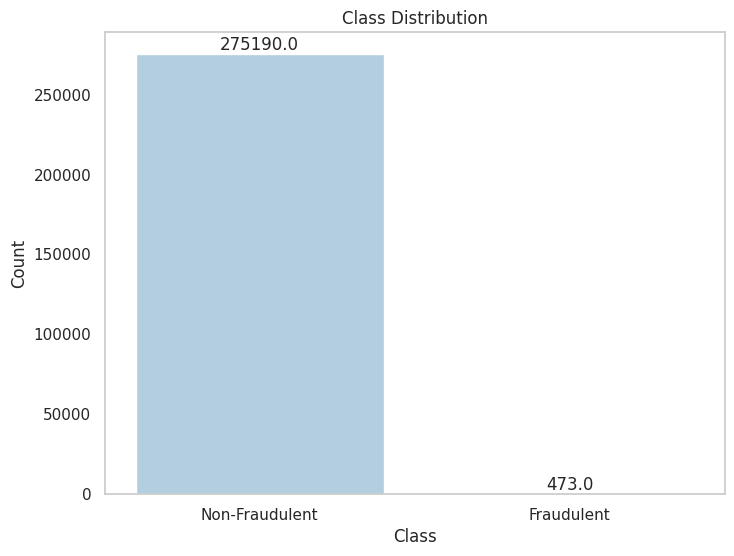

In [77]:
# Function to convert the binary variable "Class" to string
def fraud(data):
    if data == 0:
        return "Non-Fraudulent"
    else:
        return "Fraudulent"

# Copy the data
data_tmp = data_2013.copy()
data_tmp['Class'] = data_tmp['Class'].apply(fraud)

# Figure size
plt.figure(figsize=(8, 6))

# Bar plot with counts on bars and different colors
ax = sns.countplot(data=data_tmp, x='Class', palette='Blues')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()

del data_tmp

##### 2013 Data Train, Test Split - Pre Feature Engineering

In [78]:
# Separate the dataset into features (X) and target variable (Y)
# X_data_2013 contains all features except 'Class'
# Y_data_2013 contains the target "Class" column
X_data_2013 = data_2013.drop(['Class'], axis=1)
Y_data_2013 = data_2013['Class']
print(X_data_2013.shape)
print(Y_data_2013.shape)

(275663, 29)
(275663,)


In [79]:
scaler = StandardScaler()

X_train_2013, X_test_2013, y_train_2013, y_test_2013 = train_test_split(X_data_2013, Y_data_2013, test_size=0.3, random_state=42)
X_test_2013 = X_test_2013.reset_index(drop=True)
y_test_2013 = y_test_2013.reset_index(drop=True)
X_train_2013 = scaler.fit_transform(X_train_2013)
X_test_2013 = scaler.transform(X_test_2013)

print(X_train_2013.shape)
print(X_test_2013.shape)
print(y_train_2013.shape)
print(y_test_2013.shape)

(192964, 29)
(82699, 29)
(192964,)
(82699,)


#### 2023 Dataset



##### 2023 Data Shaping

In [80]:
#Among the 31 features in the 2023 credit card dataset, the "Id" feature will not contribute to the training of the model so we are
#setting the "Id" column as the index.
data_2023.set_index('id', inplace=True)

In [81]:
#Lets check for missing values in 2023 dataset
data_2023.isna().sum().sum()

0

In [82]:
# Lets check for duplicates if any in 2023 dataset
data_2023.duplicated().any()

True

In [83]:
#If there are any duplicates, drop those duplicates
data_2023.drop_duplicates(inplace=True)
data_2023.shape

(568629, 30)

##### 2023 Data Visualization

Unlike the 2013 dataset, the 2023 dataset is almost perfectly balanced between fraudlent and non-fraudulent examples. Though the classes are balanced, this is unlikely to be comparable to real world data as the ratio of non-fraudulent transactions to fraudulent transactions is incredibly high. In reality, fraudulent transactions represents a fraction of one percent of all credit card transactions.

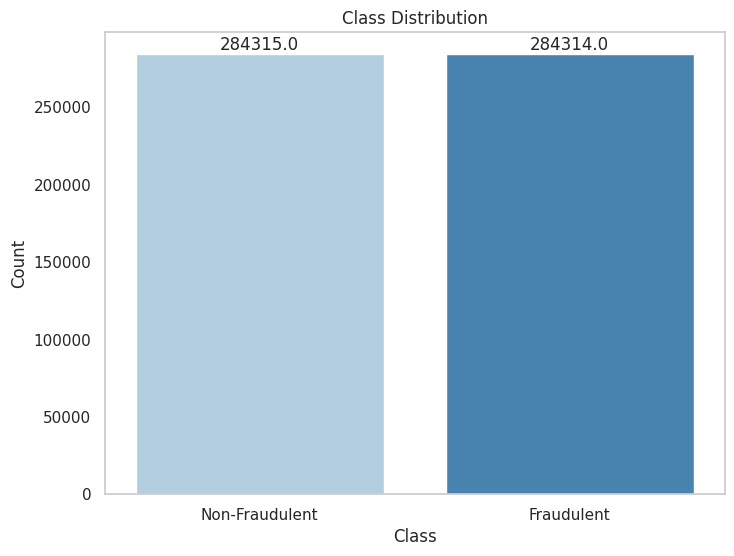

In [84]:
# Function to convert the binary variable "Class" to string
def fraud(data):
    if data == 0:
        return "Non-Fraudulent"
    else:
        return "Fraudulent"

# Copy the data
data_tmp = data_2023.copy()
data_tmp['Class'] = data_tmp['Class'].apply(fraud)

# Figure size
plt.figure(figsize=(8, 6))

# Bar plot with counts on bars and different colors
ax = sns.countplot(data=data_tmp, x='Class', palette='Blues')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()

del data_tmp

##### 2023 Data Train, Test Split - Pre Feature Engineering

In [85]:
# Separate the dataset into features (X) and target variable (Y)
# X_data_2023 contains all features except 'Class'
# Y_data_2023 contains the target "Class" column
X_data_2023 = data_2023.drop(['Class'], axis=1)
Y_data_2023 = data_2023['Class']
print(X_data_2023.shape)
print(Y_data_2023.shape)

(568629, 29)
(568629,)


In [86]:
scaler = StandardScaler()

X_train_2023, X_test_2023, y_train_2023, y_test_2023 = train_test_split(X_data_2023, Y_data_2023, test_size=0.3, random_state=42)
X_test_2023 = X_test_2023.reset_index(drop=True)
y_test_2023 = y_test_2023.reset_index(drop=True)
X_train_2023 = scaler.fit_transform(X_train_2023)
X_test_2023 = scaler.transform(X_test_2023)

print(X_train_2023.shape)
print(X_test_2023.shape)
print(y_train_2023.shape)
print(y_test_2023.shape)

(398040, 29)
(170589, 29)
(398040,)
(170589,)


## Sensible Methods

The following sections encompasses the four following models:


1.   Logistic Regression
2.   K Nearest Neighbors
3.   XGBoost
4.   Random Forest

Each model had individual functions created for running that model to train on 2013 data and test on 2013 data, train on 2023 data and test on 2023 data, and train on 2023 data and test on 2013 data. This method allows any user of the notebook to run each type of model and type of dataset disparate of the rest of the cases/models.



### Logistic Regression


#### Function Creation

##### Train on 2013 , Test on 2013

In [87]:
# Train on 2013, Test on 2013
def lr_model_evaluation_2013_2013(model):
    model.fit(X_train_2013,y_train_2013)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2013-2013): ", recall)
    print("Precision (2013-2013): ", precision)
    print("Accuracy (2013-2013): ", accuracy)
    print()
    print(f"Classification Report - Logistic Regression (2013-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2023

In [88]:
# Train on 2023, Test on 2023
def lr_model_evaluation_2023_2023(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2023 = model.predict(X_test_2023)
    accuracy = accuracy_score(y_test_2023, y_pred_2023)
    recall = recall_score(y_test_2023, y_pred_2023)
    precision = precision_score(y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - Logistic Regression (2023-2023): ")
    print(classification_report(y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2013

In [89]:
# Train on 2023, Test on 2013
def lr_model_evaluation_2023_2013(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2023-2013): ", recall)
    print("Precision (2023-2013): ", precision)
    print("Accuracy (2023-2013): ", accuracy)
    print()
    print(f"Classification Report - Logistic Regression (2023-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

#### Initial Results

Recall (2013-2013):  0.5735294117647058
Precision (2013-2013):  0.8387096774193549
Accuracy (2013-2013):  0.9991172807410005

Classification Report - Logistic Regression (2013-2013): 
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     82563
           1     0.8387    0.5735    0.6812       136

    accuracy                         0.9991     82699
   macro avg     0.9190    0.7867    0.8404     82699
weighted avg     0.9990    0.9991    0.9990     82699



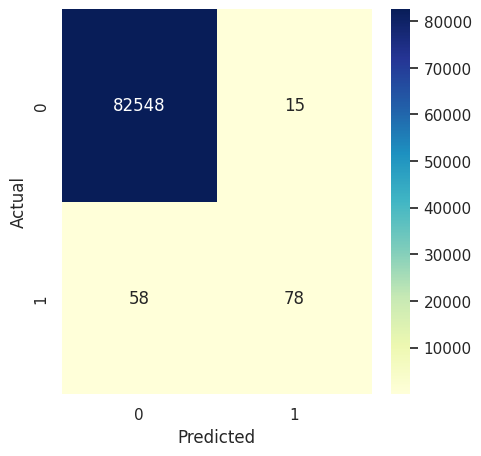

In [90]:
# Initial Results for Logistic Regression Model training on 2013 data and testing on 2013 data
logreg = LogisticRegression()
lr_model_evaluation_2013_2013(logreg)

Recall (2023-2023):  0.9518759145449225
Precision (2023-2023):  0.9776372424074831
Accuracy (2023-2023):  0.9649977431135653

Classification Report - Logistic Regression (2023-2023): 
              precision    recall  f1-score   support

           0     0.9530    0.9782    0.9654     85164
           1     0.9776    0.9519    0.9646     85425

    accuracy                         0.9650    170589
   macro avg     0.9653    0.9650    0.9650    170589
weighted avg     0.9653    0.9650    0.9650    170589



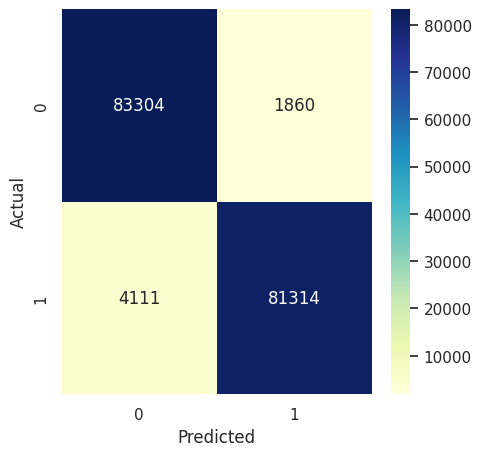

In [91]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
logreg = LogisticRegression()
lr_model_evaluation_2023_2023(logreg)

Recall (2023-2013):  1.0
Precision (2023-2013):  0.0016805476608259397
Accuracy (2023-2013):  0.023083713225069226

Classification Report - Logistic Regression (2023-2013): 
              precision    recall  f1-score   support

           0     1.0000    0.0215    0.0420     82563
           1     0.0017    1.0000    0.0034       136

    accuracy                         0.0231     82699
   macro avg     0.5008    0.5107    0.0227     82699
weighted avg     0.9984    0.0231    0.0420     82699



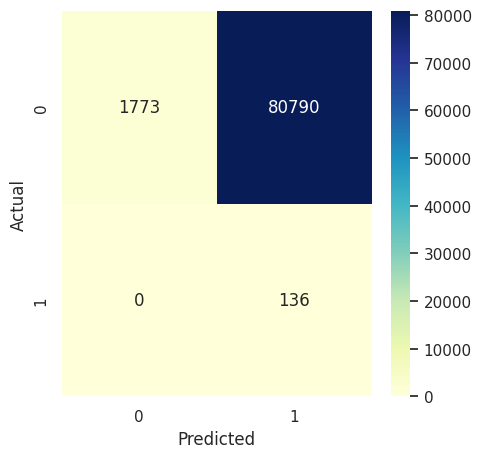

In [92]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
logreg = LogisticRegression()
lr_model_evaluation_2023_2013(logreg)

### K Nearest Neighbors

#### Function Creation

##### Train on 2013 , Test on 2013

In [93]:
# Train on 2013, Test on 2013
def knn_model_evaluation_2013_2013(model):
    model.fit(X_train_2013,y_train_2013)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2013-2013): ", recall)
    print("Precision (2013-2013): ", precision)
    print("Accuracy (2013-2013): ", accuracy)
    print()
    print(f"Classification Report - K Nearest Neighbors - k={k} (2013-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2023

In [94]:
# Train on 2023, Test on 2023
def knn_model_evaluation_2023_2023(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2023 = model.predict(X_test_2023)
    accuracy = accuracy_score(y_test_2023, y_pred_2023)
    recall = recall_score(y_test_2023, y_pred_2023)
    precision = precision_score(y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - K Nearest Neighbors - k={k} (2023-2023): ")
    print(classification_report(y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2013

In [95]:
# Train on 2023, Test on 2013
def knn_model_evaluation_2023_2013(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2023-2013): ", recall)
    print("Precision (2023-2013): ", precision)
    print("Accuracy (2023-2013): ", accuracy)
    print()
    print(f"Classification Report - K Nearest Neighbors - k={k} (2023-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

#### Initial Results

Recall (2013-2013):  0.7941176470588235
Precision (2013-2013):  0.864
Accuracy (2013-2013):  0.9994558579910277

Classification Report - K Nearest Neighbors - k=1 (2013-2013): 
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     82563
           1     0.8640    0.7941    0.8276       136

    accuracy                         0.9995     82699
   macro avg     0.9318    0.8970    0.9137     82699
weighted avg     0.9994    0.9995    0.9994     82699



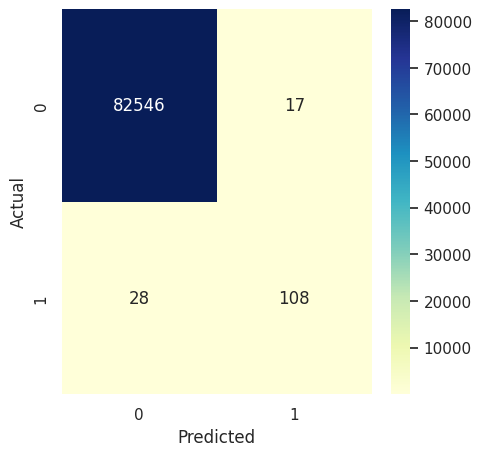

Recall (2013-2013):  0.7941176470588235
Precision (2013-2013):  0.9
Accuracy (2013-2013):  0.9995163182142468

Classification Report - K Nearest Neighbors - k=3 (2013-2013): 
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     82563
           1     0.9000    0.7941    0.8438       136

    accuracy                         0.9995     82699
   macro avg     0.9498    0.8970    0.9218     82699
weighted avg     0.9995    0.9995    0.9995     82699



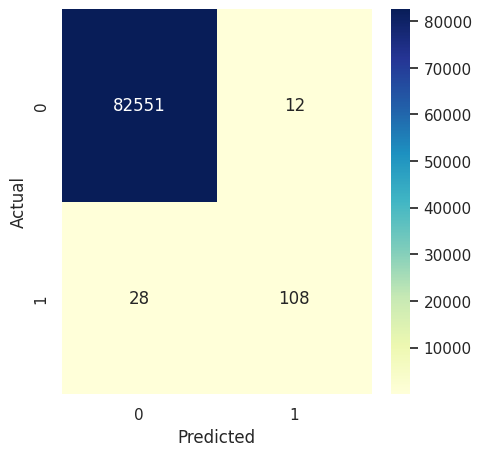

Recall (2013-2013):  0.7720588235294118
Precision (2013-2013):  0.8974358974358975
Accuracy (2013-2013):  0.9994800420803154

Classification Report - K Nearest Neighbors - k=5 (2013-2013): 
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     82563
           1     0.8974    0.7721    0.8300       136

    accuracy                         0.9995     82699
   macro avg     0.9485    0.8860    0.9149     82699
weighted avg     0.9995    0.9995    0.9995     82699



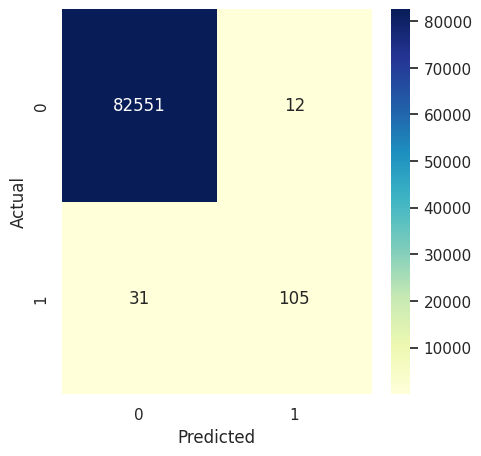

In [96]:
# Initial Results for Logistic Regression Model training on 2013 data and testing on 2013 data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2013_2013(knn)

Recall (2023-2023):  0.9999765876499853
Precision (2023-2023):  0.9981887868377387
Accuracy (2023-2023):  0.999079659298079

Classification Report - K Nearest Neighbors - k=1 (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9982    0.9991     85164
           1     0.9982    1.0000    0.9991     85425

    accuracy                         0.9991    170589
   macro avg     0.9991    0.9991    0.9991    170589
weighted avg     0.9991    0.9991    0.9991    170589



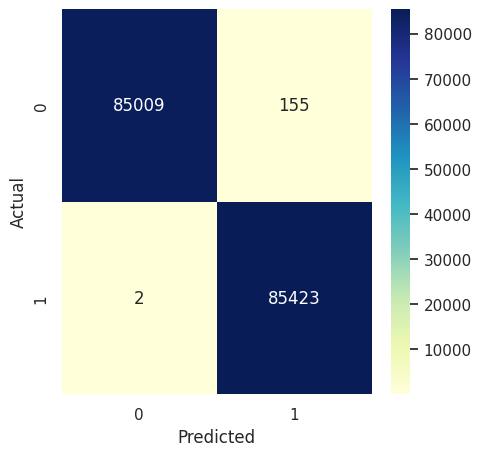

Recall (2023-2023):  0.9999765876499853
Precision (2023-2023):  0.9966398711950625
Accuracy (2023-2023):  0.9983000076206555

Classification Report - K Nearest Neighbors - k=3 (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9966    0.9983     85164
           1     0.9966    1.0000    0.9983     85425

    accuracy                         0.9983    170589
   macro avg     0.9983    0.9983    0.9983    170589
weighted avg     0.9983    0.9983    0.9983    170589



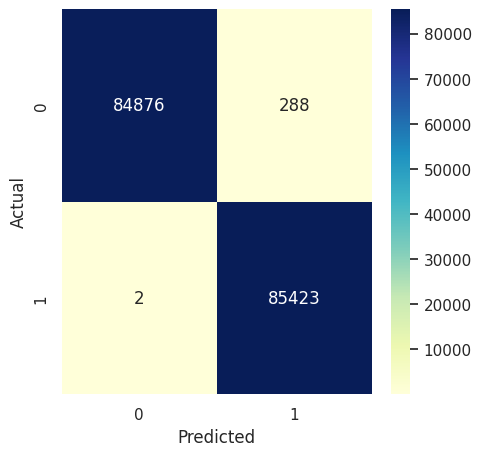

Recall (2023-2023):  0.9999882938249927
Precision (2023-2023):  0.9953972896444844
Accuracy (2023-2023):  0.9976786310957917

Classification Report - K Nearest Neighbors - k=5 (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9954    0.9977     85164
           1     0.9954    1.0000    0.9977     85425

    accuracy                         0.9977    170589
   macro avg     0.9977    0.9977    0.9977    170589
weighted avg     0.9977    0.9977    0.9977    170589



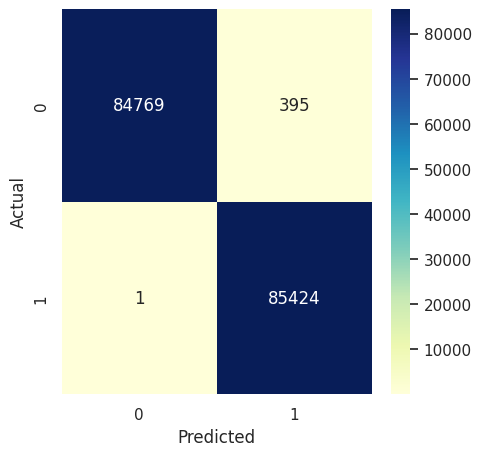

In [97]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2023_2023(knn)

Recall (2023-2013):  1.0
Precision (2023-2013):  0.019565530139548266
Accuracy (2023-2013):  0.9175927157523066

Classification Report - K Nearest Neighbors - k=1 (2023-2013): 
              precision    recall  f1-score   support

           0     1.0000    0.9175    0.9570     82563
           1     0.0196    1.0000    0.0384       136

    accuracy                         0.9176     82699
   macro avg     0.5098    0.9587    0.4977     82699
weighted avg     0.9984    0.9176    0.9554     82699



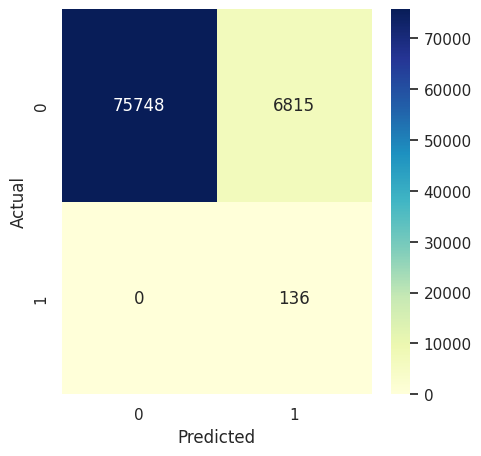

Recall (2023-2013):  1.0
Precision (2023-2013):  0.014445034519383962
Accuracy (2023-2013):  0.8877979177499123

Classification Report - K Nearest Neighbors - k=3 (2023-2013): 
              precision    recall  f1-score   support

           0     1.0000    0.8876    0.9405     82563
           1     0.0144    1.0000    0.0285       136

    accuracy                         0.8878     82699
   macro avg     0.5072    0.9438    0.4845     82699
weighted avg     0.9984    0.8878    0.9390     82699



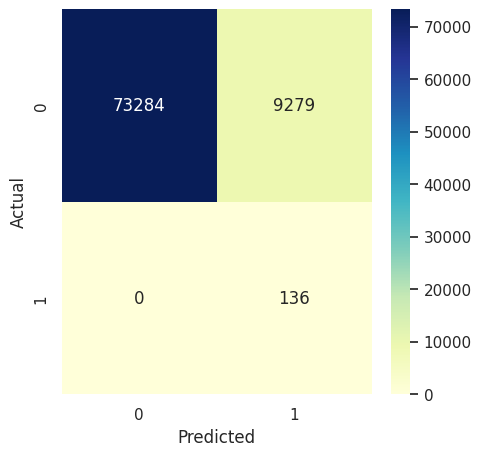

Recall (2023-2013):  1.0
Precision (2023-2013):  0.012592592592592593
Accuracy (2023-2013):  0.8710504359182094

Classification Report - K Nearest Neighbors - k=5 (2023-2013): 
              precision    recall  f1-score   support

           0     1.0000    0.8708    0.9310     82563
           1     0.0126    1.0000    0.0249       136

    accuracy                         0.8711     82699
   macro avg     0.5063    0.9354    0.4779     82699
weighted avg     0.9984    0.8711    0.9295     82699



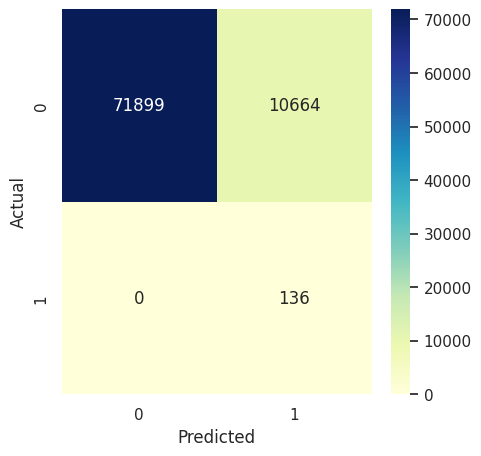

In [98]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2023_2013(knn)

### XGBoost

#### Function Creation

##### Train on 2013 , Test on 2013

In [99]:
# Train on 2013, Test on 2013
def xgb_model_evaluation_2013_2013(model):
    model.fit(X_train_2013,y_train_2013)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2013-2013): ", recall)
    print("Precision (2013-2013): ", precision)
    print("Accuracy (2013-2013): ", accuracy)
    print()
    print(f"Classification Report - XGBoost (2013-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2023

In [100]:
# Train on 2023, Test on 2023
def xgb_model_evaluation_2023_2023(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2023 = model.predict(X_test_2023)
    accuracy = accuracy_score(y_test_2023, y_pred_2023)
    recall = recall_score(y_test_2023, y_pred_2023)
    precision = precision_score(y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - XGBoost (2023-2023): ")
    print(classification_report(y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2013

In [101]:
# Train on 2023, Test on 2013
def xgb_model_evaluation_2023_2013(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2023-2013): ", recall)
    print("Precision (2023-2013): ", precision)
    print("Accuracy (2023-2013): ", accuracy)
    print()
    print(f"Classification Report - XGBoost (2023-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

#### Initial Results

Recall (2013-2013):  0.7867647058823529
Precision (2013-2013):  0.9304347826086956
Accuracy (2013-2013):  0.9995525943481783

Classification Report - XGBoost (2013-2013): 
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     82563
           1     0.9304    0.7868    0.8526       136

    accuracy                         0.9996     82699
   macro avg     0.9650    0.8933    0.9262     82699
weighted avg     0.9995    0.9996    0.9995     82699



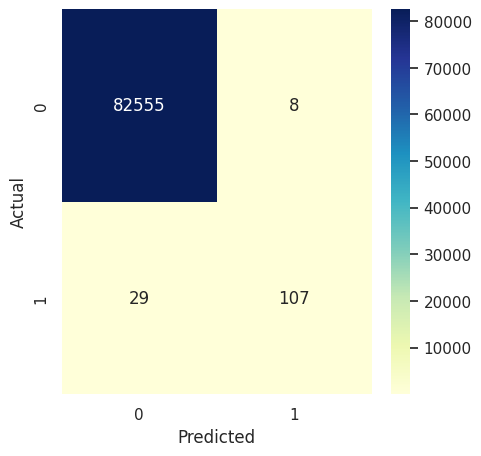

In [102]:
# Initial Results for Logistic Regression Model training on 2013 data and 2013 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2013_2013(xgb)

Recall (2023-2023):  1.0
Precision (2023-2023):  0.999531972152343
Accuracy (2023-2023):  0.9997655182925042

Classification Report - XGBoost (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9995    0.9998     85164
           1     0.9995    1.0000    0.9998     85425

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589



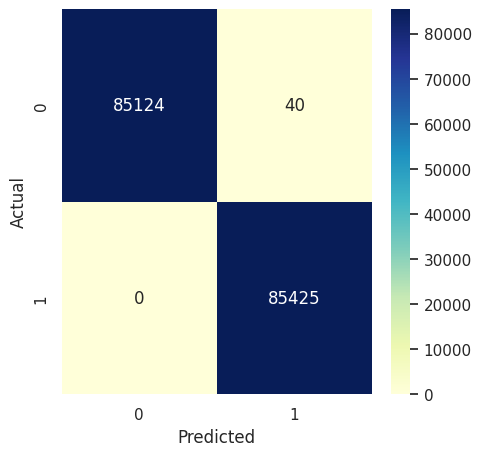

In [103]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2023_2023(xgb)

Recall (2023-2013):  0.9779411764705882
Precision (2023-2013):  0.006635402115346238
Accuracy (2023-2013):  0.7591990229627927

Classification Report - XGBoost (2023-2013): 
              precision    recall  f1-score   support

           0     1.0000    0.7588    0.8629     82563
           1     0.0066    0.9779    0.0132       136

    accuracy                         0.7592     82699
   macro avg     0.5033    0.8684    0.4380     82699
weighted avg     0.9983    0.7592    0.8615     82699



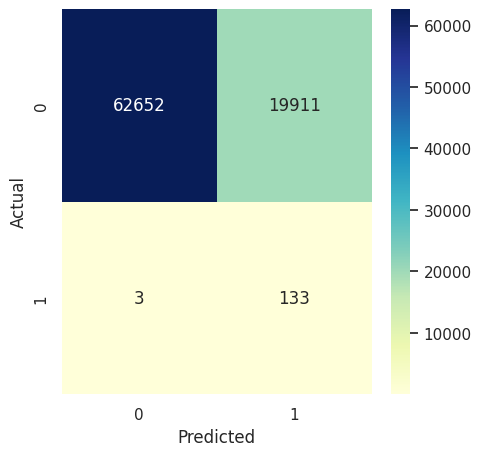

In [104]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2023_2013(xgb)

### Random Forest


#### Function Creation

##### Train on 2013 , Test on 2013

In [105]:
# Train on 2013, Test on 2013
def rf_model_evaluation_2013_2013(model):
    model.fit(X_train_2013,y_train_2013)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2013-2013): ", recall)
    print("Precision (2013-2013): ", precision)
    print("Accuracy (2013-2013): ", accuracy)
    print()
    print(f"Classification Report - Random Forest (2013-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2023

In [106]:
# Train on 2023, Test on 2023
def rf_model_evaluation_2023_2023(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2023 = model.predict(X_test_2023)
    accuracy = accuracy_score(y_test_2023, y_pred_2023)
    recall = recall_score(y_test_2023, y_pred_2023)
    precision = precision_score(y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - Random Forest (2023-2023): ")
    print(classification_report(y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

##### Train on 2023, Test on 2013

In [107]:
# Train on 2023, Test on 2013
def rf_model_evaluation_2023_2013(model):
    model.fit(X_train_2023,y_train_2023)
    y_pred_2013 = model.predict(X_test_2013)
    accuracy = accuracy_score(y_test_2013, y_pred_2013)
    recall = recall_score(y_test_2013, y_pred_2013)
    precision = precision_score(y_test_2013, y_pred_2013)
    print("Recall (2023-2013): ", recall)
    print("Precision (2023-2013): ", precision)
    print("Accuracy (2023-2013): ", accuracy)
    print()
    print(f"Classification Report - Random Forest (2023-2013): ")
    print(classification_report(y_test_2013, y_pred_2013, digits=4))

    y_pred_pd = pd.Series(y_pred_2013, name='Predicted')
    y_test_pd = pd.Series(y_test_2013, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

#### Initial Results

Recall (2013-2013):  0.7573529411764706
Precision (2013-2013):  0.9035087719298246
Accuracy (2013-2013):  0.9994679500356716

Classification Report - Random Forest (2013-2013): 
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     82563
           1     0.9035    0.7574    0.8240       136

    accuracy                         0.9995     82699
   macro avg     0.9516    0.8786    0.9119     82699
weighted avg     0.9994    0.9995    0.9994     82699



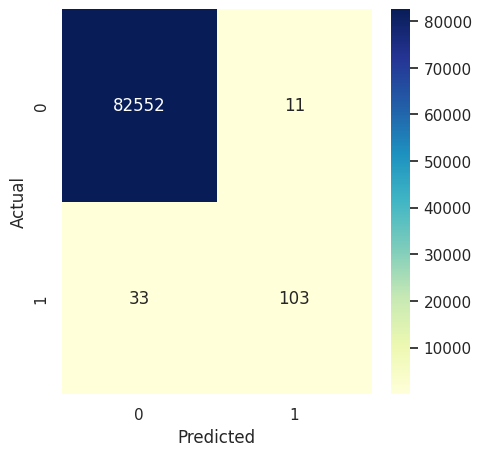

In [108]:
# Initial Results for Logistic Regression Model training on 2013 data and 2013 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2013_2013(rf)

Recall (2023-2023):  1.0
Precision (2023-2023):  0.9997659313008368
Accuracy (2023-2023):  0.9998827591462521

Classification Report - Random Forest (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     85164
           1     0.9998    1.0000    0.9999     85425

    accuracy                         0.9999    170589
   macro avg     0.9999    0.9999    0.9999    170589
weighted avg     0.9999    0.9999    0.9999    170589



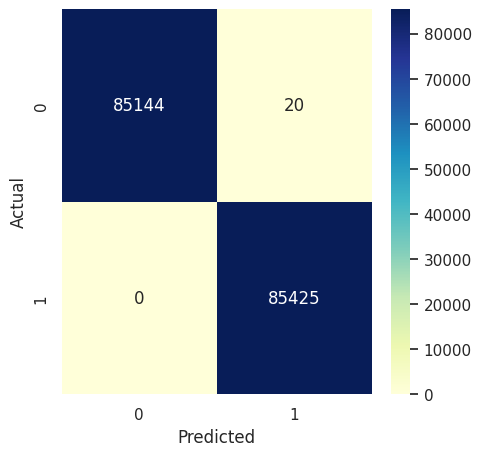

In [109]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2023_2023(rf)

Recall (2023-2013):  0.6691176470588235
Precision (2023-2013):  0.009114583333333334
Accuracy (2023-2013):  0.8798292603296292

Classification Report - Random Forest (2023-2013): 
              precision    recall  f1-score   support

           0     0.9994    0.8802    0.9360     82563
           1     0.0091    0.6691    0.0180       136

    accuracy                         0.8798     82699
   macro avg     0.5042    0.7746    0.4770     82699
weighted avg     0.9978    0.8798    0.9345     82699



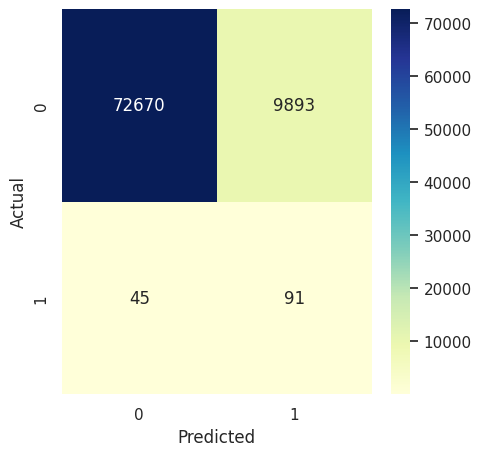

In [110]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2023_2013(rf)

## Feature Engineering


For feature engineering section of our research, we decided to evaluate the impact of the removal of significant features in the 2013 and 2023 datasets on trained model's performance.

We used the correlation matrix to determine which features are highly correlated with each other to remove as part of our work. From the correlation matrix, we identified that features V16 and V17 are highly correlated (0.848) and features V17 and V18 are also highly correlated (0.851). We removed feature V17 and noticed that the accuracy and f1 score of the logistric regression model went from 0.96 to 1 (add code or screenshot). We found that it was very strange. Then, we decided to experiment a little more by removing other features and more features at the same time. We noticed the same behavior with the model.

To investigate this further, we used Recursive Feature Elimination (RFE) to select the top 15 features that contribute most or are most important to the target Class.

### Feature Removal

#### 2013 Dataset

##### 2013 Dataset Correlation Matrix

As seen below, the features within the 2013 dataset have very little or no correlation with every other feature. Due to this, the decision was made to only pursue the effects of feature engineering on the 2023 dataset.

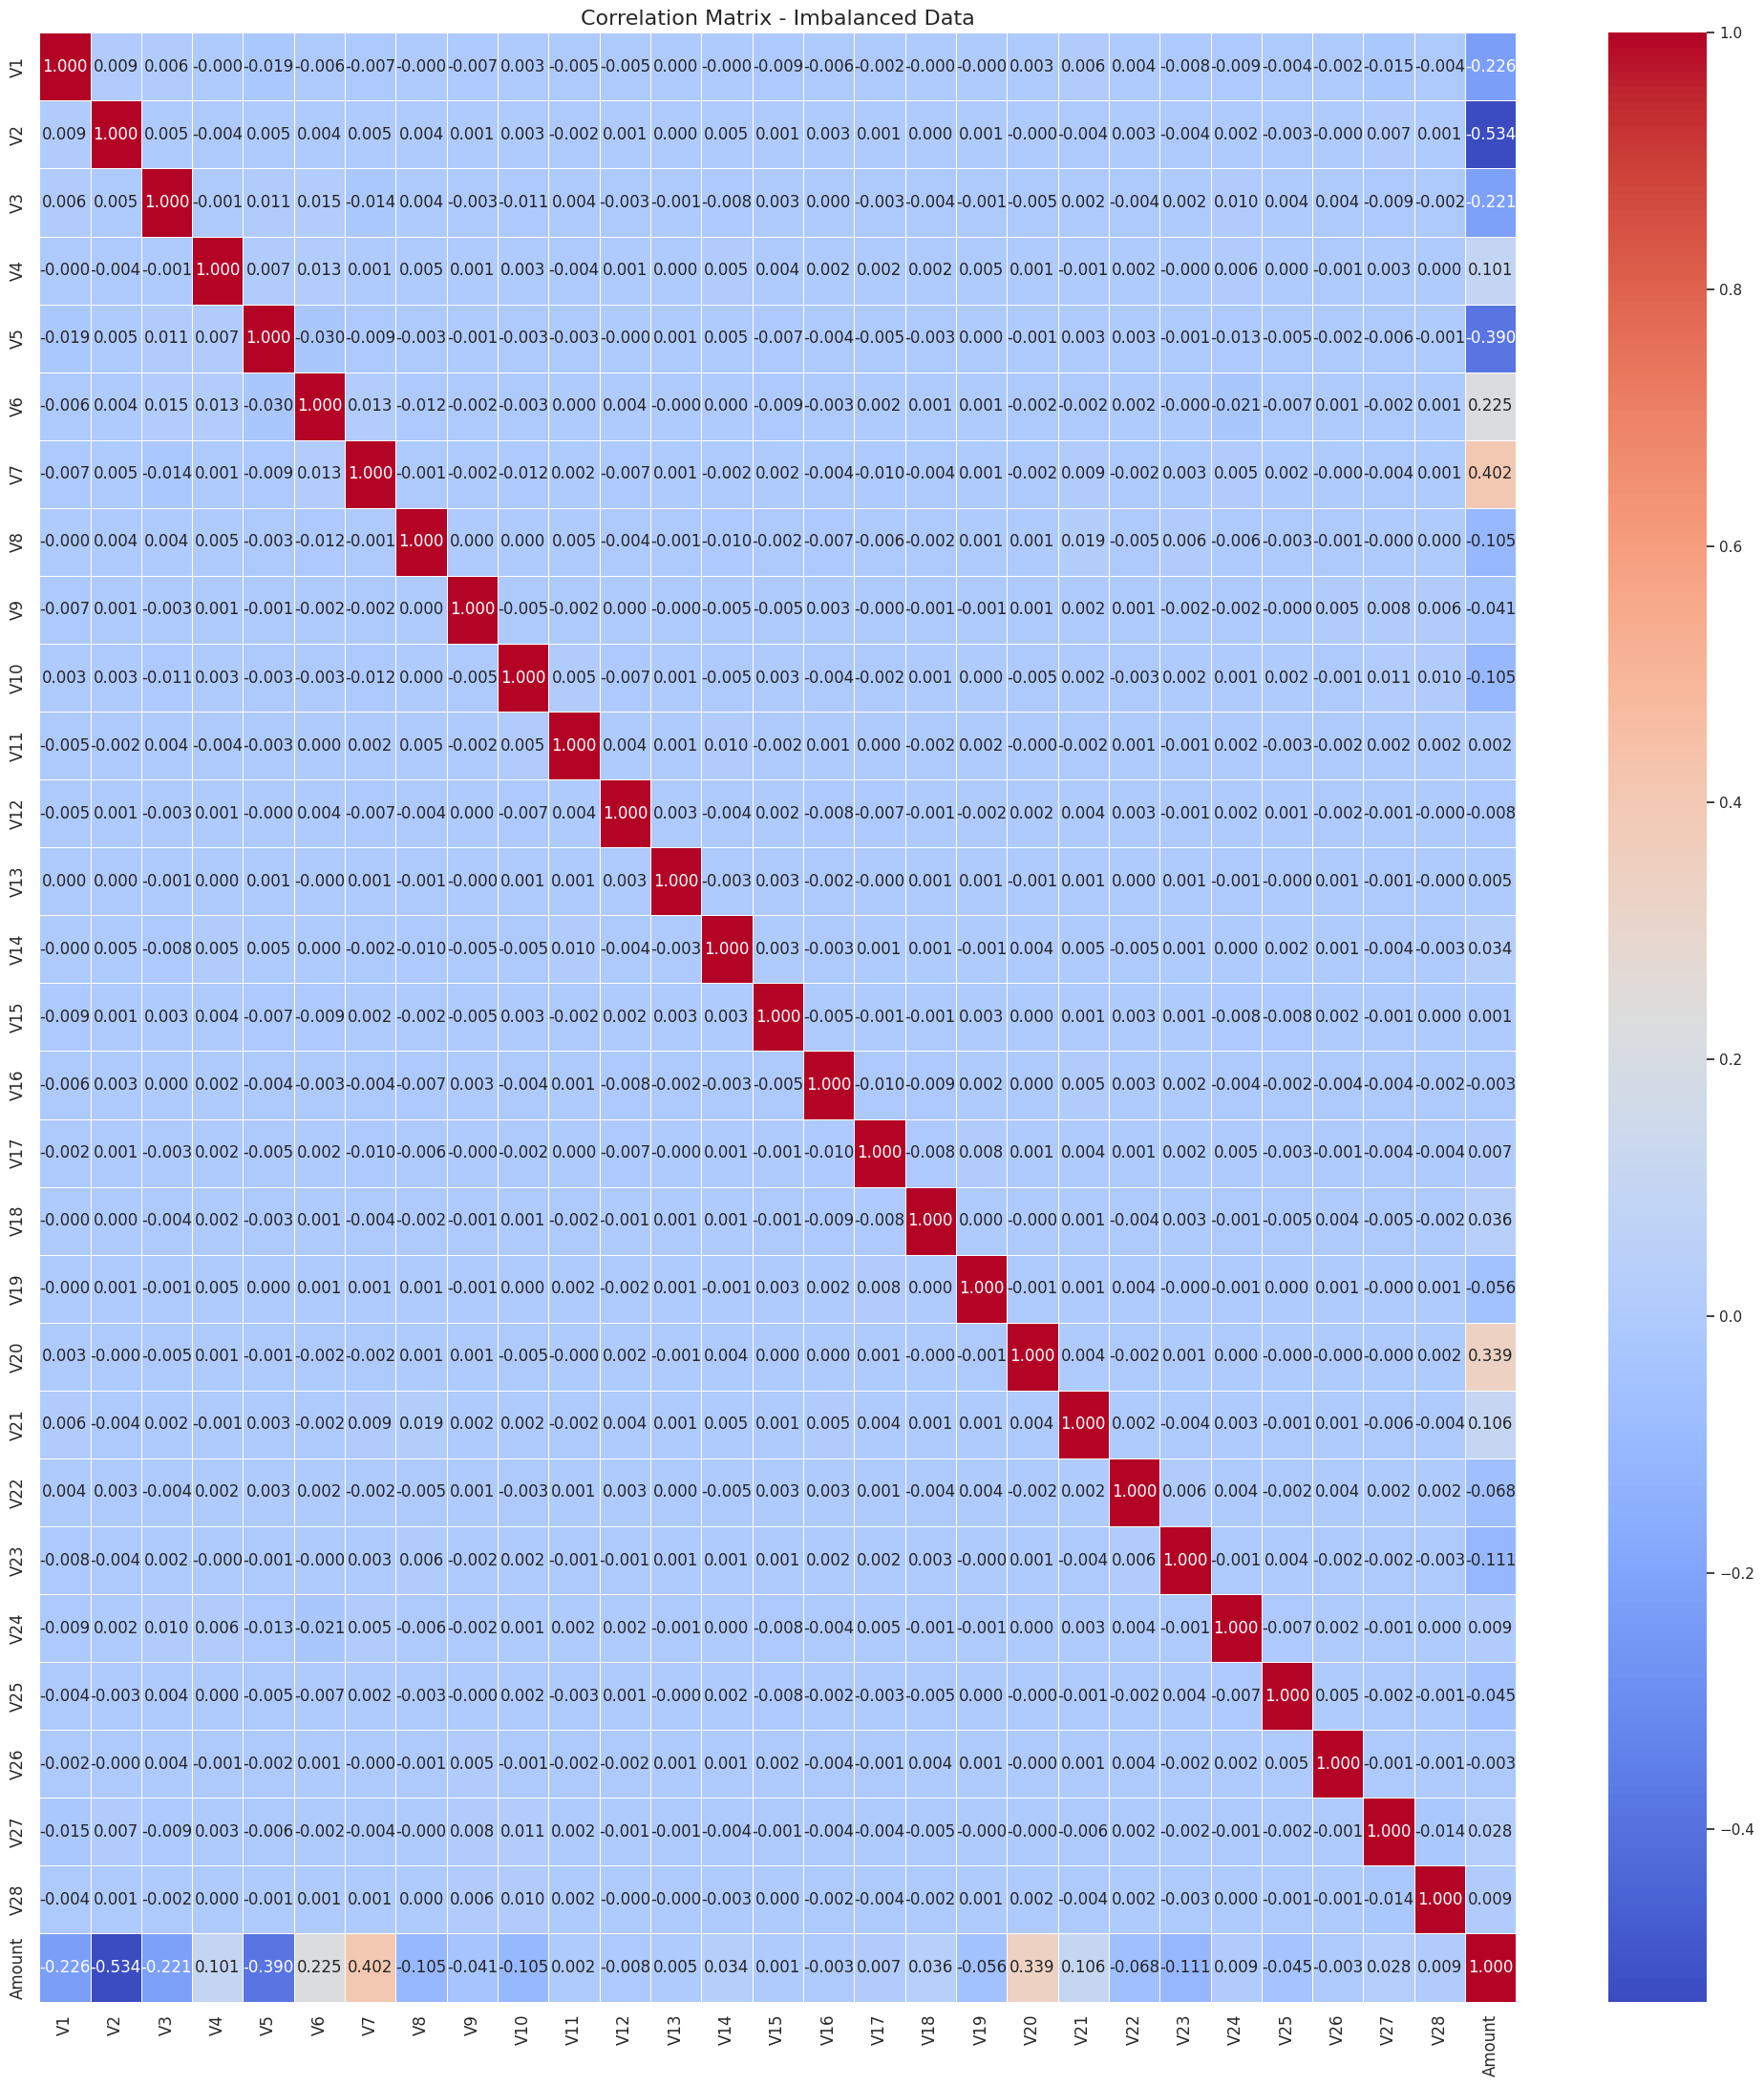

In [111]:
# Remove Class column
cormat_data_2013 = data_2013.drop('Class', axis=1)

# Correlation matrix for the 2023 balanced dataset
correlation_matrix = cormat_data_2013.sample(frac=1).corr()

plt.figure(figsize=(20, 22))

# Plot the correlation matrix without annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,  fmt='.3f')
plt.title("Correlation Matrix - Imbalanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### 2023 Dataset

##### 2023 Dataset Correlation Matrix

Unlike the 2013 dataset, the 2023 dataset shows clear correlations between several feature sets.

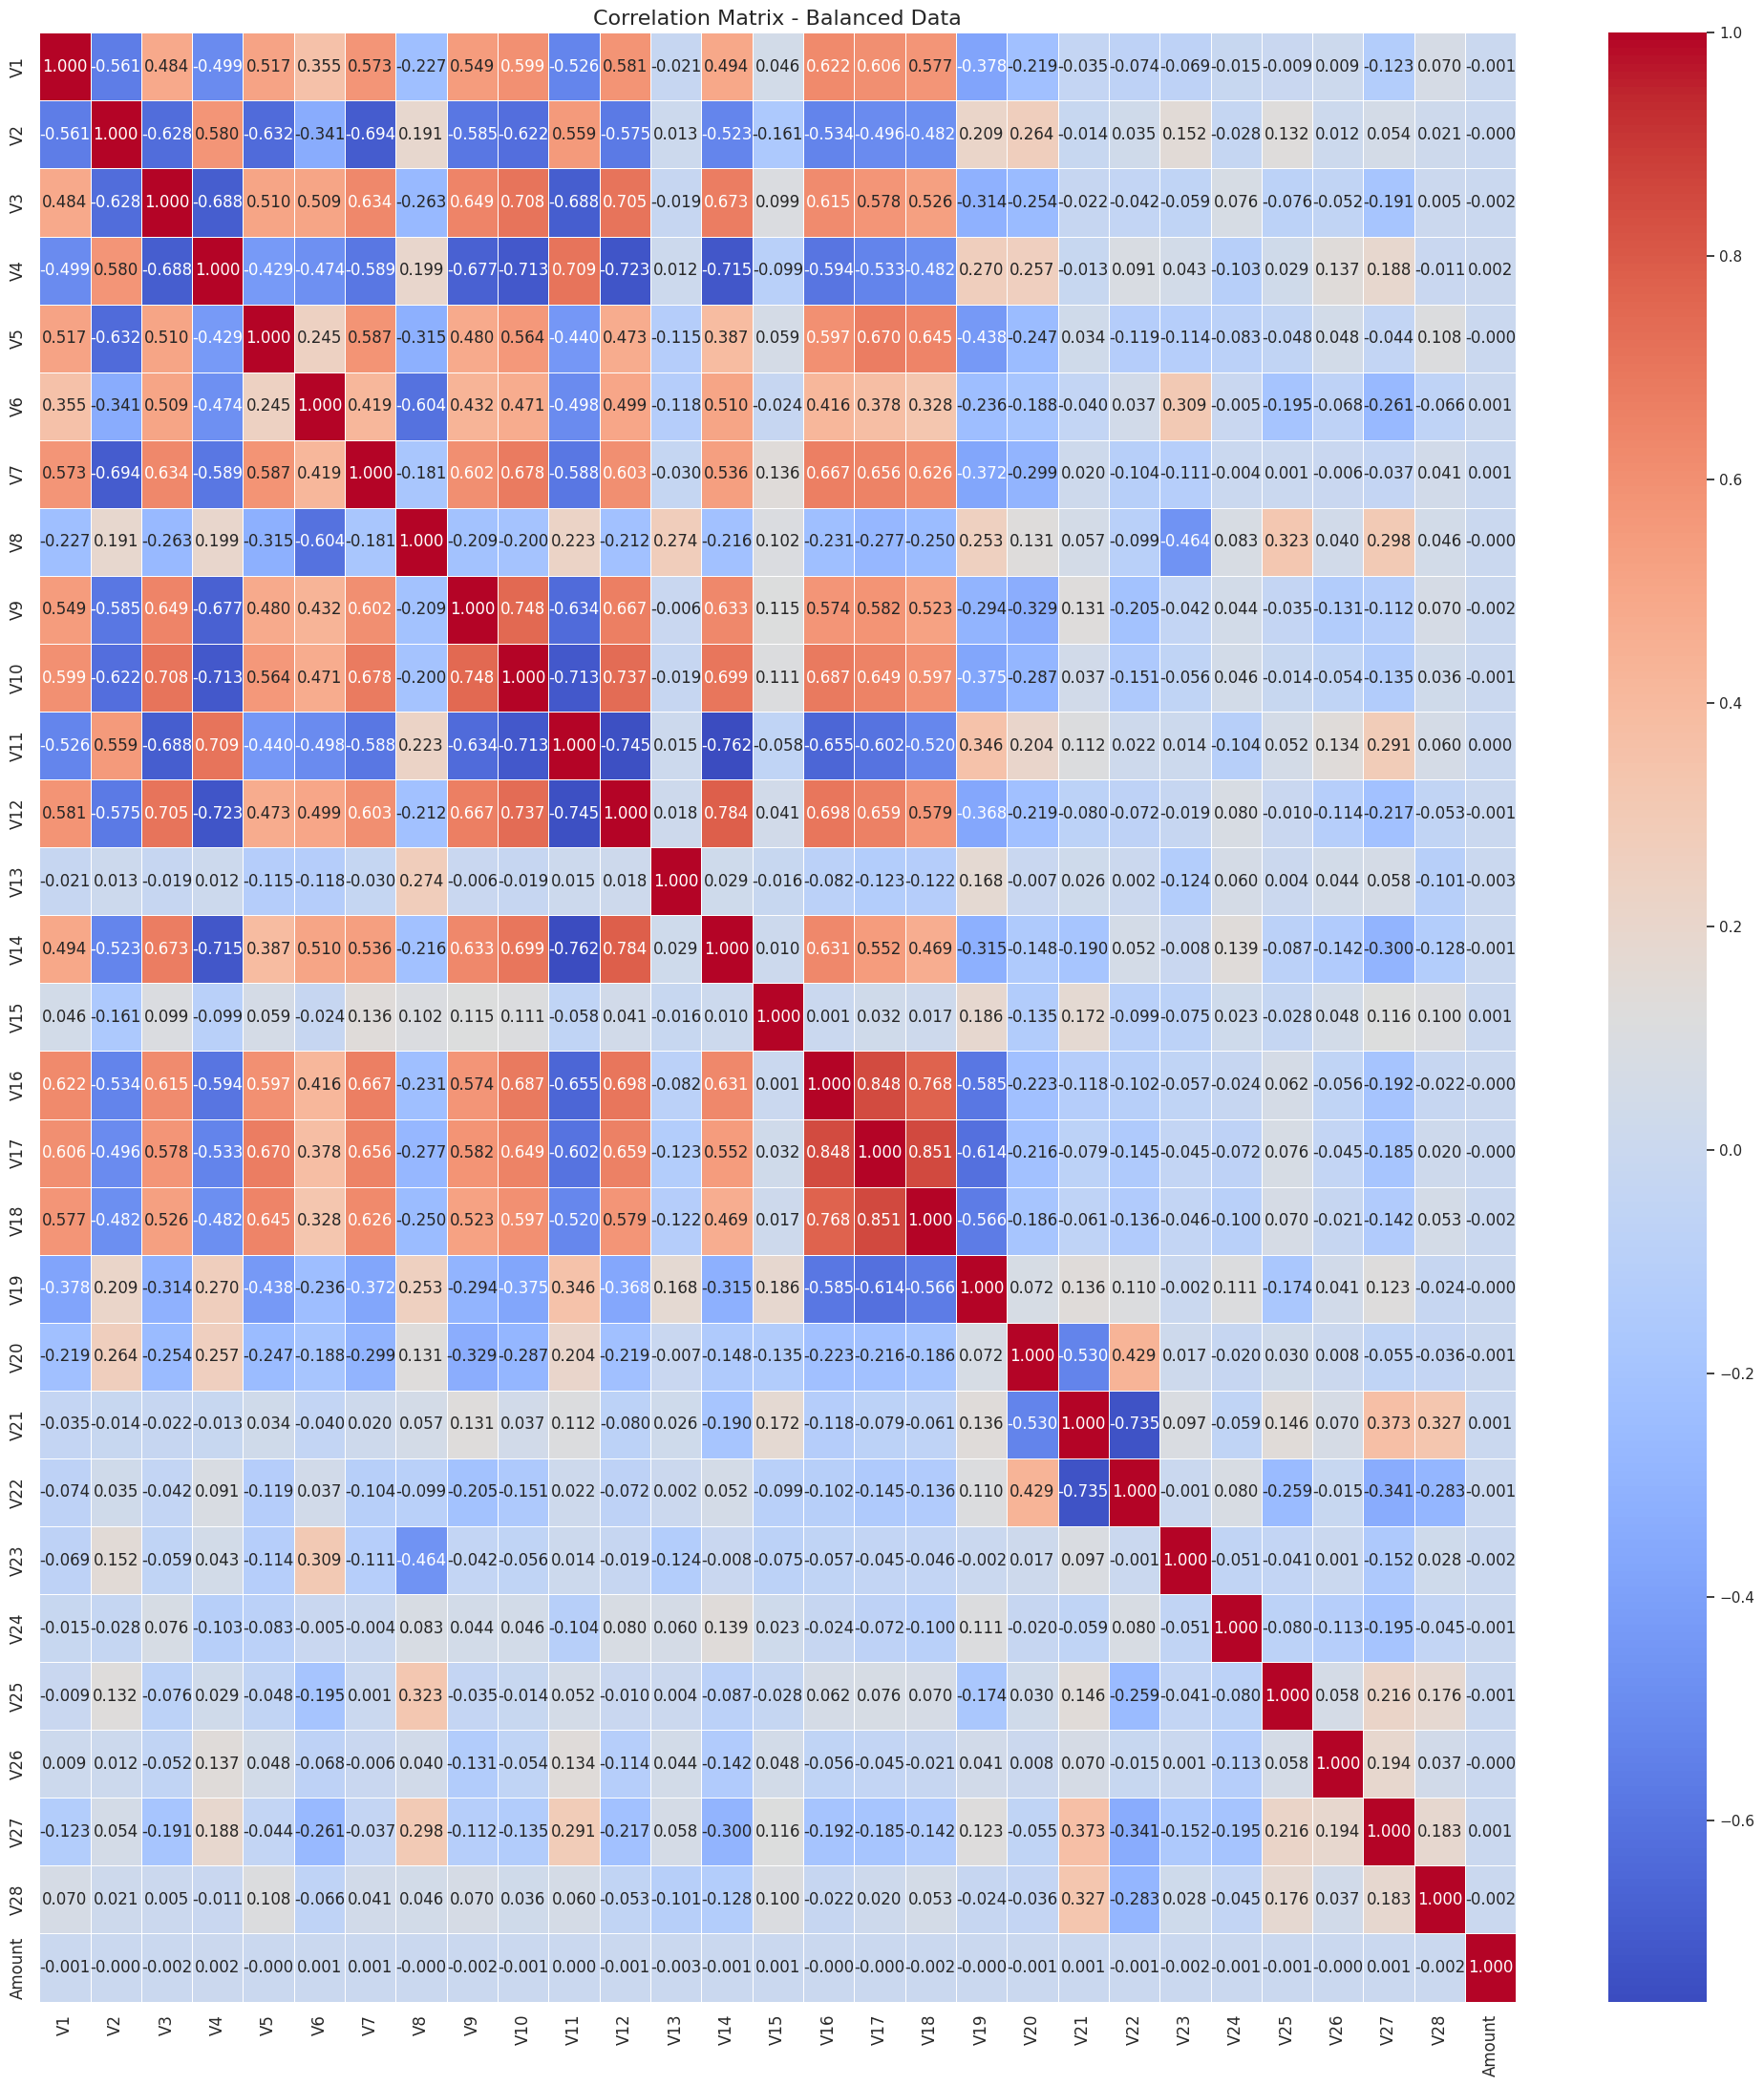

In [112]:
# Remove Class column
cormat_data_2023 = data_2023.drop('Class', axis=1)

# Correlation matrix for the 2023 balanced dataset
correlation_matrix = cormat_data_2023.sample(frac=1).corr()

plt.figure(figsize=(20, 22))

# Plot the correlation matrix without annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,  fmt='.3f')
plt.title("Correlation Matrix - Balanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

##### 2023 Feature Removal


As the title suggests, this section describes our initial attempt at feature engineering. We began by removing one or more features along with their associated data, then ran each model on the reduced datasets. To refine the feature set, we used Recursive Feature Elimination (RFE) to select the top 15 features—roughly half of the dataset—that contributed most to the model's performance. RFE is a feature selection technique that evaluates the importance of individual features and reduces the set to a desired size.

The selected 15 features are: ['V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V22', 'V23'].

After identifying the top 15 features, we examined the correlation matrix of the 2023 dataset to check for any inter-correlations among these features. Many of them were found to be correlated, with features 16, 17, and 18 showing a particularly high correlation. We decided to test their removal. Removing individual features such as 'V17', 'V18', and 'V19' did not significantly affect model performance. However, removing all three features at once resulted in a noticeable performance drop, suggesting that 'V16', 'V17', and 'V18' provide overlapping information.

Because the features are anonymized, it's challenging to identify their nature and to fully interpret their contributions. However, we can deduct that the high correlation between certain features indicates redundancy within the dataset from the results in this section.

In [113]:
# Initialize a logistic regression model
model = LogisticRegression()

# Apply RFE to select the most important features
# Select top 15 features
selector = RFE(model, n_features_to_select=15)
selector = selector.fit(X_train_2023, y_train_2023)

# Print the selected features
selected_features = X_data_2023.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V22', 'V23'],
      dtype='object')


In [114]:
#Drop feature(s) highly correlated with each other:
#Feature 17 is highly correlated with feature 18 so dropping either to evaluate the impact.
imp_columns = ['V16', 'V17', 'V18', 'Class']
post_X_data_2023 = data_2023.drop(columns=imp_columns)
post_Y_data_2023 = data_2023['Class']
print(post_X_data_2023.shape)
print(post_Y_data_2023.shape)

(568629, 26)
(568629,)


In [115]:
post_X_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568629 entries, 0 to 568629
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568629 non-null  float64
 1   V2      568629 non-null  float64
 2   V3      568629 non-null  float64
 3   V4      568629 non-null  float64
 4   V5      568629 non-null  float64
 5   V6      568629 non-null  float64
 6   V7      568629 non-null  float64
 7   V8      568629 non-null  float64
 8   V9      568629 non-null  float64
 9   V10     568629 non-null  float64
 10  V11     568629 non-null  float64
 11  V12     568629 non-null  float64
 12  V13     568629 non-null  float64
 13  V14     568629 non-null  float64
 14  V15     568629 non-null  float64
 15  V19     568629 non-null  float64
 16  V20     568629 non-null  float64
 17  V21     568629 non-null  float64
 18  V22     568629 non-null  float64
 19  V23     568629 non-null  float64
 20  V24     568629 non-null  float64
 21  V25     568629 

###### 2023 Data Train, Test Split - Post Feature Engineering

In [116]:
scaler = StandardScaler()

post_X_train_2023, post_X_test_2023, post_y_train_2023, post_y_test_2023 = train_test_split(post_X_data_2023, post_Y_data_2023, test_size=0.3, random_state=42)
post_X_test_2023 = post_X_test_2023.reset_index(drop=True)
post_y_test_2023 = post_y_test_2023.reset_index(drop=True)
post_X_train_2023 = scaler.fit_transform(post_X_train_2023)
post_X_test_2023 = scaler.transform(post_X_test_2023)

print(post_X_train_2023.shape)
print(post_X_test_2023.shape)
print(post_y_train_2023.shape)
print(post_y_test_2023.shape)

(398040, 26)
(170589, 26)
(398040,)
(170589,)


### Logistic Regression

Train on 2023, Test on 2023

In [117]:
# Train on 2023, Test on 2023
def post_lr_model_evaluation_2023_2023(model):
    model.fit(post_X_train_2023,post_y_train_2023)
    y_pred_2023 = model.predict(post_X_test_2023)
    accuracy = accuracy_score(post_y_test_2023, y_pred_2023)
    recall = recall_score(post_y_test_2023, y_pred_2023)
    precision = precision_score(post_y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - Logistic Regression - Post Feature Removal (Errored) (2023-2023): ")
    print(classification_report(post_y_test_2023, y_pred_2023, digits=4))

    post_y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    post_y_test_pd = pd.Series(post_y_test_2023, name = 'Actual')
    cross = pd.crosstab(post_y_test_pd, post_y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

Post Feature Removal Results

Recall (2023-2023):  0.940204858062628
Precision (2023-2023):  0.9778061845629413
Accuracy (2023-2023):  0.9593701821336663

Classification Report - Logistic Regression - Post Feature Removal (Errored) (2023-2023): 
              precision    recall  f1-score   support

           0     0.9422    0.9786    0.9601     85164
           1     0.9778    0.9402    0.9586     85425

    accuracy                         0.9594    170589
   macro avg     0.9600    0.9594    0.9594    170589
weighted avg     0.9601    0.9594    0.9594    170589



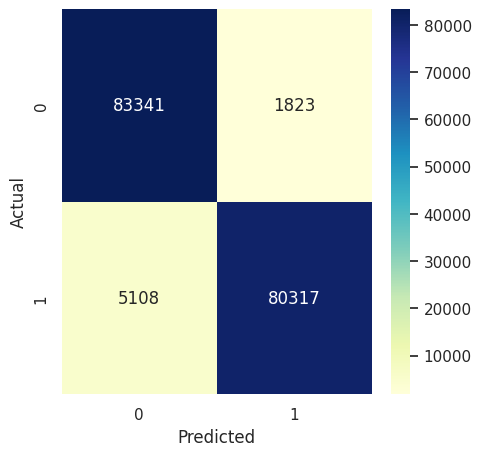

In [118]:
# Post Feature Removal Results for Logistic Regression Model training on 2023 data and testing on 2023 data
logreg = LogisticRegression()
post_lr_model_evaluation_2023_2023(logreg)

### K Nearest Neighbors

##### Train on 2023, Test on 2023

In [119]:

# Train on 2023, Test on 2023
def post_knn_model_evaluation_2023_2023(model):
    model.fit(post_X_train_2023,post_y_train_2023)
    y_pred_2023 = model.predict(post_X_test_2023)
    accuracy = accuracy_score(post_y_test_2023, y_pred_2023)
    recall = recall_score(post_y_test_2023, y_pred_2023)
    precision = precision_score(post_y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - K Nearest Neighbors - k={k} (2023-2023): ")
    print(classification_report(post_y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(post_y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()


#### Post Feature Removal Results

Recall (2023-2023):  0.9999648814749781
Precision (2023-2023):  0.9978389617671453
Accuracy (2023-2023):  0.9988979359747697

Classification Report - K Nearest Neighbors - k=1 (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9978    0.9989     85164
           1     0.9978    1.0000    0.9989     85425

    accuracy                         0.9989    170589
   macro avg     0.9989    0.9989    0.9989    170589
weighted avg     0.9989    0.9989    0.9989    170589



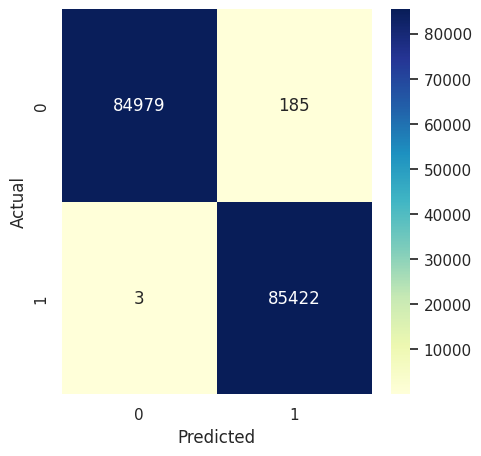

Recall (2023-2023):  0.9999765876499853
Precision (2023-2023):  0.9961285056264941
Accuracy (2023-2023):  0.9980420777424102

Classification Report - K Nearest Neighbors - k=3 (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9961    0.9980     85164
           1     0.9961    1.0000    0.9980     85425

    accuracy                         0.9980    170589
   macro avg     0.9981    0.9980    0.9980    170589
weighted avg     0.9980    0.9980    0.9980    170589



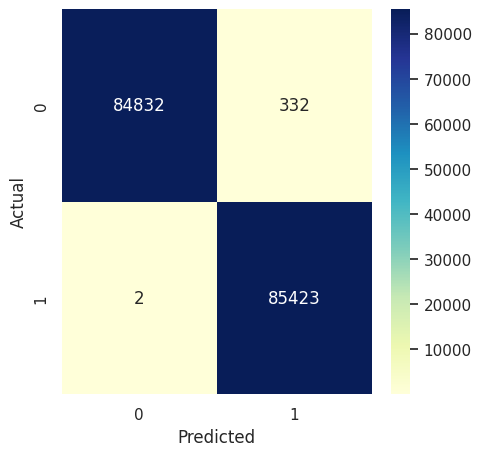

Recall (2023-2023):  0.9999882938249927
Precision (2023-2023):  0.9947018479488583
Accuracy (2023-2023):  0.997326908534548

Classification Report - K Nearest Neighbors - k=5 (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9947    0.9973     85164
           1     0.9947    1.0000    0.9973     85425

    accuracy                         0.9973    170589
   macro avg     0.9973    0.9973    0.9973    170589
weighted avg     0.9973    0.9973    0.9973    170589



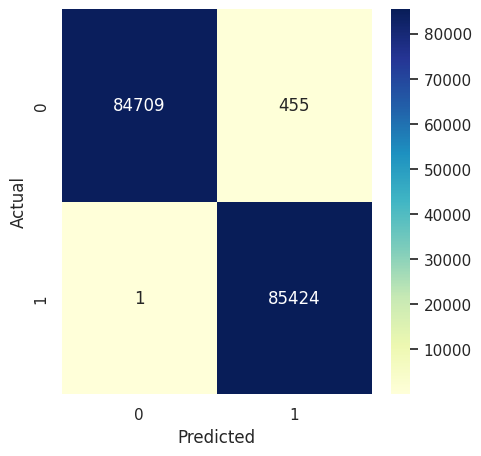

In [120]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and testing on 2023 data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  post_knn_model_evaluation_2023_2023(knn)


### XGBoost

##### Train on 2023, Test on 2023

In [121]:

# Train on 2023, Test on 2023
def post_xgb_model_evaluation_2023_2023(model):
    model.fit(post_X_train_2023,post_y_train_2023)
    y_pred_2023 = model.predict(post_X_test_2023)
    accuracy = accuracy_score(post_y_test_2023, y_pred_2023)
    recall = recall_score(post_y_test_2023, y_pred_2023)
    precision = precision_score(post_y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - XGBoost (2023-2023): ")
    print(classification_report(post_y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(post_y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()


#### Post Feature Removal Results

Recall (2023-2023):  1.0
Precision (2023-2023):  0.9994267262559374
Accuracy (2023-2023):  0.9997127599083176

Classification Report - XGBoost (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997     85164
           1     0.9994    1.0000    0.9997     85425

    accuracy                         0.9997    170589
   macro avg     0.9997    0.9997    0.9997    170589
weighted avg     0.9997    0.9997    0.9997    170589



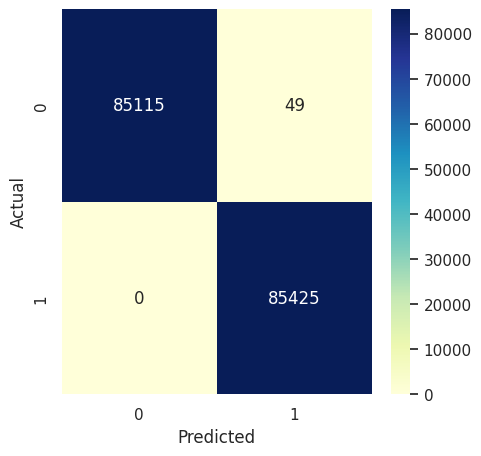

In [122]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and 2023 testing on data
xgb = XGBClassifier()
post_xgb_model_evaluation_2023_2023(xgb)


### Random Forest

##### Train on 2023, Test on 2023

In [123]:

# Train on 2023, Test on 2023
def post_rf_model_evaluation_2023_2023(model):
    model.fit(post_X_train_2023,post_y_train_2023)
    y_pred_2023 = model.predict(post_X_test_2023)
    accuracy = accuracy_score(post_y_test_2023, y_pred_2023)
    recall = recall_score(post_y_test_2023, y_pred_2023)
    precision = precision_score(post_y_test_2023, y_pred_2023)
    print("Recall (2023-2023): ", recall)
    print("Precision (2023-2023): ", precision)
    print("Accuracy (2023-2023): ", accuracy)
    print()
    print(f"Classification Report - Random Forest (2023-2023): ")
    print(classification_report(post_y_test_2023, y_pred_2023, digits=4))

    y_pred_pd = pd.Series(y_pred_2023, name='Predicted')
    y_test_pd = pd.Series(post_y_test_2023, name = 'Actual')
    cross = pd.crosstab(y_test_pd, y_pred_pd)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()


#### Post Feature Removal Results

Recall (2023-2023):  1.0
Precision (2023-2023):  0.9997542307422231
Accuracy (2023-2023):  0.9998768971035648

Classification Report - Random Forest (2023-2023): 
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     85164
           1     0.9998    1.0000    0.9999     85425

    accuracy                         0.9999    170589
   macro avg     0.9999    0.9999    0.9999    170589
weighted avg     0.9999    0.9999    0.9999    170589



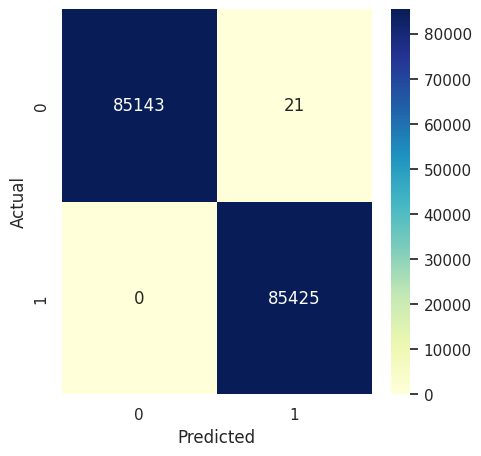

In [124]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and 2023 testing on data
rf = RandomForestClassifier(random_state=42)
post_rf_model_evaluation_2023_2023(rf)


## Error Analysis

Looking into the recall values for all the models, we decided to investigate further into what errors could potentially be occurring for each.
2013 Recall Values Analysis:

For the 2013 credit card fraud detection dataset, the K Nearest Neighbors model for k =1 and k =3 had the same recall value, while k=5's recall value was slightly lower. Based on these values, it appears that there was an increase in false negatives as the k-value when up suggesting that the K Nearest Neighbors model might have been too influenced by irrelevant or outlier neighbors leading to misclassification.

For the Logistic Regression model, the recall was around 0.57, which means that it performed the worst in identifying positive instances. Based on this analysis, it appears that this model was too simple to capture the 2013 data effectively and suggests that there was potential underfitting for the data.
Looking at XGBoost and Random Forest, it looked like they performed fairly similar, but Random Forest's recall was slower, which could mean that it was too complex for the 2013 dataset and led to false negatives. It could have also been missing some data and overfitting on other parts more.
2023 Recall Values Analysis:

The recall values for the 2023 dataset were very high with almost all the models except Logistic Regression having a recall value of 1. This suggests that the models were able to generalize very well with an absence of false negatives. This could suggest that the data was cleaner or more structured compared to the 2013 dataset. As expected, with Logistic Regression being our simplest model, it missed 5% of positive instances, but it still performed well.
Trained on 2023, Tested on 2013 Recall Values Analysis:

The recall values when the models trained on 2023 data and were tested on 2013 were all very high, with most being a value of 1, except Random Forest which was 0.669. Having a recall of 1 for K Nearest Neighbors could suggest that the structure in both the 2013 and 2023 was similar enough that it allowed for K-Nearest Neighbors to identify all positive instances correctly. However, the recall value did drop when k was equal to 5 which means that it could be overgeneralization. Surprisingly, XGBoost and Random Forest responded worse, which could mean that if the data was not properly regularized, the model was not able to generalize across the 2013 to 2023 time period which is concerning. We decided to drop features to test the significant drop in recall value when running some of these models.

Overall, our analysis of the recall values for these models suggests that KNN and Logistic Regression may have been more resilient to shifts in the data from 2013 to 2013, but more investigation and analysis is required to come to a definite conclusion.

The score of precision is the ratio of true positives to true and false positives. In the context of credit card fraud, precision scores attempt to convey the ability of the classifier to not incorrectly label it as fraud as non-fraud (non-fraud precision) or non-fraud as fraud (fraud precision). While the precision scores for each model varied, there was a pattern across all of them. The models trained and tested on the 2013 dataset had consistently high non-fraud precision and consistently lower fraud precision. The models trained and tested on the 2023 dataset had about the same high non-fraud and fraud precision. Finally, the models trained on the 2023 dataset and tested on the 2013 dataset had high non-fraud precision but very low fraud precision.

These discrepancies in precision correlate to the balance of each dataset. The 2013 dataset has many more non-fraud samples than fraud samples. This means that there are fewer fraud samples for the model to train on, so it tends to have a higher false positive rate. On the other hand, the 2023 dataset is extremely balanced with plenty of fraud and non-fraud samples to train from. The models seemed to have consistently high precision when training and testing on the 2023 dataset.

However, the 2023 test dataset is not indicative of real world data. Fraud happens far more infrequently than normal transactions, so the unbalanced 2013 dataset is actually closer to a real world sample of transactions. Since the 2023 dataset had more fraud, one could infer that it would have better precision when testing on the 2013 dataset than a model trained on the 2013 dataset. However, this was far from the case. Perhaps due to the higher number of fraud samples in the 2023 dataset, the models had very low fraud precision when testing on the 2013 dataset. This means that the models incorrectly predicted that many non-fraud transactions were fraudulent.

One potential reason for the low fraud precision is that the fraud samples in the 2013 dataset were very different compared to the fraud samples in the 2023 fraud samples, caused the models to learn different parameters for each. Another reason could be that the higher number of fraud samples in the 2023 dataset caused the models to have a wider ‘definition’ of fraud transactions to handle all the variation in the 2023 dataset. There may have been less variation between the fraud transactions in the 2013 dataset.
More research needs to be done on how the discrepancies between the datasets affects their precision with identifying fraudulent transactions.

## Overall Results

This notebook aimed to answer the results of the following:


1.   What are the impacts of using four different models and their associated effects on Accuracy, Precision, Recall, and F1 Score?
2.   What are the impacts of age and balance of a dataset on the performance the of the four models?
3.   What is the effect on the models' performance after conducting feature engineering on the datasets?

While the below sections outline the exact results, these models' ability to correctly determine credit card fraud, based on the given datasets, were heavily influenced by the type of model and the balance of the datsets it was being trained and tested on.

With regards to the type of model being used, the Random Forest model heavily outperformed all three of the other models in most of the tests. This is likely due to the Random Forest model's ensemble nature, which combines multiple decision trees to reduce overfitting and improve accuracy. Also, this particular type of model can perform feature importance calculations which helps with its ability to analyze complex datasets, such as credit card fraud detection. In line with reality, these results seem to mirror real-world applications and its widespread favorability for use in detecting fraud. Real credit card detection models tend to prefer reducing both false negatives and false positives, which is why Random Forest thrives in this instance. The only area where Random Forest did not thrive was with the train on 2023 data and test on 2013 data. Though Random Forest struggled, so did every other model.

The impacts of the age and balance of the datasets were the next areas we investigated. As seen above, the tests were split into three bins, training on 2013 data and testing on 2013 data, training on 2023 data and testing on 2023 data, and then training on 2023 data and testing on 2013 data. These three bins were initially thought to allow us to assess both the effects of age and balance, but upon testing, the effects of balance far outweighed the effects of age. The 2013 dataset's fraudlent transaction data comprises less than one percent of the total transactions, while the 2023 dataset's split between fradulent and non-fraudulent is 50% and 50%. This extreme difference in balance between the two datasets far outweighs any potential nuance which the age of the data may have provided. With that said, the results show the models performed much better when running on the 2023 dataset than on the 2013 dataset. This is simply due to the elimination of class bias within the 2023 dataset. While the elimination of bias was seen as beneficial for the performance of the model, we thought the 2013 data was more in-line with real world data. The last bin of tests was meant to assess this exact thought as the models were trained on the 2023, balanced, dataset and then tested on the more realistic dataset, 2013. The results of theses tests unfortunately did not provide any increase in performance to the original 2013 results. In fact, this bin saw massive decreases in performance across the board of all four models. Again, this is most certainly due to the difference in balance between the datasets.

The final question we attempted to answer was that of the effect of feature engineering on the performance of the models. We created correlation matrices on both the 2013 and 2023 models and found that the only dataset which might benefit from feature engineering was the 2023 dataset. This is due to the presence of highly correlated features within the 2023 dataset and the complete lack of correlation within the 2013 dataset. Though we initially had issues with feature removal (see the Feature Engineering section), we eventually found that the RFE function set provided errorless results. After conducted tests on all four models on post-feature engineered datasets, the results do not seem to improve with the use of feature engineered datasets. While this is counter to our intiial predictions, this led us to believe that these particular datasets may not benefit greatly from optimizing the set of features.

For a summary of resultant classification results, see below.

### Pre-Feature Engineering Overall Results

#### 2013 Dataset Overall Results

Logistic Regression (2013-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2013 data and testing on 2013 data
logreg = LogisticRegression()
lr_model_evaluation_2013_2013(logreg)

K Nearest Neighbors (2013-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2013 data and testing on 2013 data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2013_2013(knn)

XGBoost (2013-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2013 data and 2013 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2013_2013(xgb)

Random Forest (2013-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2013 data and 2013 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2013_2013(rf)

#### 2023 Dataset Overall Results

Logistic Regression (2023-2023)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
logreg = LogisticRegression()
lr_model_evaluation_2023_2023(logreg)

K Nearest Neighbors (2023-2023)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2023_2023(knn)

XGBoost (2023-2023)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2023_2023(xgb)

Random Forest (2023-2023)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2023_2023(rf)

#### Multi-Year Dataset Overall Results

Logistic Regression (2023-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
logreg = LogisticRegression()
lr_model_evaluation_2023_2013(logreg)

K Nearest Neighbors (2023-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2023_2013(knn)

XGBoost (2023-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2023_2013(xgb)

Random Forest (2023-2013)

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2013 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2023_2013(rf)

### Post-Feature Engineering Overall Results (2023-2023)

#### Logistic Regression

Pre-Feature Engineering

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
logreg = LogisticRegression()
lr_model_evaluation_2023_2023(logreg)

Post-Feature Engineering

In [ ]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and testing on 2023 data
logreg = LogisticRegression()
post_lr_model_evaluation_2023_2023(logreg)

#### K Nearest Neighbors

Pre-Feature Engineering

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model_evaluation_2023_2023(knn)

Post-Feature Engineering

In [ ]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and testing on 2023 data
for k in [1, 3, 5]:
  knn = KNeighborsClassifier(n_neighbors=k)
  post_knn_model_evaluation_2023_2023(knn)


#### XGBoost

Pre-Feature Engineering

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
xgb = XGBClassifier()
xgb_model_evaluation_2023_2023(xgb)

Post-Feature Engineering

In [ ]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and 2023 testing on data
xgb = XGBClassifier()
post_xgb_model_evaluation_2023_2023(xgb)

#### Random Forest

Pre-Feature Engineering

In [ ]:
# Initial Results for Logistic Regression Model training on 2023 data and 2023 testing on data
rf = RandomForestClassifier(random_state=42)
rf_model_evaluation_2023_2023(rf)

Post-Feature Engineering

In [ ]:

# Post Feature Removal Results for Logistic Regression Model training on 2023 data and 2023 testing on data
rf = RandomForestClassifier(random_state=42)
post_rf_model_evaluation_2023_2023(rf)


## Sources

[1] Baishya, Manjit. “Does Removal of Highly Correlated Features Always Improve Model Performance?” Medium, June 17, 2024. https://medium.com/@datacodedesign/does-removal-of-highly-correlated-features-always-improve-model-performance-8d820d30b71d#:~:text=Understanding%20Feature%20Correlation,impact%20generalization%20to%20new%20data .

[2] Brownlee, Jason. “Recursive Feature Elimination (RFE) for Feature Selection in Python.” MachineLearningMastery.com, August 27, 2020. https://machinelearningmastery.com/rfe-feature-selection-in-python/ .

[3] “Credit Card Fraud Detection.” Kaggle, March 23, 2018. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download .

[4] “Copy of Cyber Attack Detection with Random Forest .” Google colab. Accessed December 8, 2024. https://colab.research.google.com/drive/1AxXUNXAI6Edggr9ailj9g6kBPYIqVoj-?usp=drive_link .

[5] Elgiriyewithana, Nidula. “Credit Card Fraud Detection Dataset 2023.” Kaggle, September 18, 2023. https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023 .